In [1]:

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers.schedules import ExponentialDecay 
import cv2 
import tensorflow as tf
from keras.models import model_from_json 
import numpy as np

In [2]:
from zipfile import ZipFile
file_name ="archive (2).zip"

with ZipFile(file_name,"r") as zip:
    zip.printdir()
    print("Extracting all the files now..")
    zip.extractall()
    print("Done")

File Name                                             Modified             Size
test/angry/im0.png                             2020-12-11 06:08:02         2191
test/angry/im1.png                             2020-12-11 06:08:02         1810
test/angry/im10.png                            2020-12-11 06:08:02         1708
test/angry/im100.png                           2020-12-11 06:08:02         1788
test/angry/im101.png                           2020-12-11 06:08:02         1639
test/angry/im102.png                           2020-12-11 06:08:02         1724
test/angry/im103.png                           2020-12-11 06:08:02         1642
test/angry/im104.png                           2020-12-11 06:08:02         1786
test/angry/im105.png                           2020-12-11 06:08:02         1783
test/angry/im106.png                           2020-12-11 06:08:02         1641
test/angry/im107.png                           2020-12-11 06:08:02         1675
test/angry/im108.png                    

In [3]:
train_data_gen = ImageDataGenerator(rescale=1./255) 
validation_data_gen = ImageDataGenerator(rescale=1./255) 


Preprocess all train images


In [4]:
train_generator = train_data_gen.flow_from_directory('train',target_size=(48,48),
                                                     batch_size=64,
                                                     color_mode = "grayscale",
                                                     class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


Preprocess all text images

In [5]:
validation_generator = validation_data_gen.flow_from_directory('test',
                                                               target_size=(48,48),
                                                               batch_size=64,
                                                               color_mode="grayscale",
                                                               class_mode='categorical')

Found 7178 images belonging to 7 classes.


Create a CNN Model Structure

In [6]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3,3),activation='relu',
                         input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024,activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7,activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate,decay_steps=100000,
                               decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy',optimizer=optimizer,
                      metrics=['accuracy'])

C:\Users\Prasanna\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
info = emotion_model.fit(
    train_generator,
    steps_per_epoch = 28709//64,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 7178 // 64
)

Epoch 1/30


C:\Users\Prasanna\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 427s 936ms/step - accuracy: 0.2479 - loss: 1.8242 - val_accuracy: 0.3407 - val_loss: 1.7113
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.3281 - loss: 1.7303 - val_accuracy: 0.3000 - val_loss: 1.8858
Epoch 3/30


c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 131s 292ms/step - accuracy: 0.3552 - loss: 1.6526 - val_accuracy: 0.4173 - val_loss: 1.5463
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.4375 - loss: 1.4978 - val_accuracy: 0.3000 - val_loss: 1.6459
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 141s 313ms/step - accuracy: 0.4046 - loss: 1.5454 - val_accuracy: 0.4400 - val_loss: 1.4616
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.5469 - loss: 1.4700 - val_accuracy: 0.2000 - val_loss: 1.7983
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 126s 281ms/step - accuracy: 0.4330 - loss: 1.4786 - val_accuracy: 0.4628 - val_loss: 1.4108
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.4219 - loss: 1.5118 - val_accuracy: 0.5000 - val_loss: 1.1898
Epoch 9/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 276ms/step - accuracy: 0.4617 - loss: 1.4119 - val_accuracy: 0.4849 - val_loss: 1.3494
Epoch 10/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.4844 - loss: 1.3966 - va

In [8]:
emotion_model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5818 - loss: 1.1073


[1.124525785446167, 0.5755084753036499]

In [9]:
accuracy = info.history['accuracy']
val_accuracy = info.history['val_accuracy']
loss = info.history['loss']
val_loss =  info.history['val_loss']

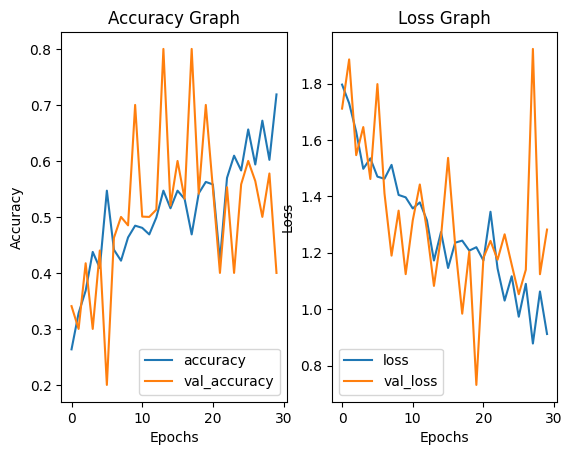

In [10]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy,label = 'val_accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='loss')
plt.plot(val_loss,label = 'val_loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model_json = emotion_model.to_json()
with open("emotion_model.json","w") as json_file:
    json_file.write(model_json)

emotion_model.save('emotion_model.h5')

In [12]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",  
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"} 

In [13]:
json_file = open('emotion_model.json', 'r') 
loaded_model_json = json_file.read() 
json_file.close() 
emotion_model = model_from_json(loaded_model_json) 


In [ ]:
emotion_model = 'emotion_model.h5'
cap = cv2.VideoCapture(0) 
while True: 
	# Find haar cascade to draw bounding box around face 
	ret, frame = cap.read() 
	frame = cv2.resize(frame, (1280, 720)) 
	if not ret: 
		print(ret) 
	# Create a face detector 
	face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

	gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

	# detect faces available on camera 
	num_faces = face_detector.detectMultiScale(gray_frame, 
											scaleFactor=1.3, minNeighbors=5) 

	# take each face available on the camera and Preprocess it 
	for (x, y, w, h) in num_faces:
		cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4) 
		roi_gray_frame = gray_frame[y:y + h, x:x + w] 
		cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, 
															(48, 48)), -1), 0) 

		# predict the emotions 
		emotion_prediction = emotion_model.predict(cropped_img) 
		maxindex = int(np.argmax(emotion_prediction)) 
		cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), 
					cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA) 

	cv2.imshow('Emotion Detection', frame) 
	if cv2.waitKey(1) & 0xFF == ord('q'): 
		break

cap.release() 
cv2.destroyAllWindows()
